# Queries no ElasticSearch com Python

Neste documento exploraremos como nos comunicar com o ElasticSearch a partir do Python, bem como veremos algumas aplicações de interesse.

## 1 - Dependências

Algumas dependências que precisamos instalar para a demonstração abaixo:

- **elasticsearch**: Biblioteca cliente oficial da Elastic para comunicação com o ElasticSearch
- **requests**: Biblioteca para fazer requisições HTTP de forma simples no Python
- **matplotlib**: Biblioteca para gráficos
- **wordcloud**: Biblioteca que usa a matplotlib para desenhar wordclouds
- **pandas**: DataFrames e manipulação de dados
- **nltk**: Ferramentas básicas para processamento de linguagem natural

In [ ]:
!pip install --upgrade pip
!pip install elasticsearch requests matplotlib wordcloud pandas nltk 

### Configurações

In [1]:
ES_URL = 'https://localhost:9200'
ES_USER = 'elastic'
ES_PASS = 'elastic123'

**Atenção**: A senha está aqui nesse notebook para facilitar o entendimento. Nos seus notebooks use ferramentas como dotfiles, Pydantic ou afins para proteger suas senhas e jamais faça commit delas no seu repositório!

## 2 - Interfaceando através da interface HTTP simples

O ElasticSearch se comunica via HTTP. A princípio você não precisa de nada mais além da capacidade de fazer requisições HTTP para recuperar dados. Mas esse método **não é recomendado**.

In [2]:
import requests

In [3]:
resp = requests.get(
    ES_URL + '/kibana_sample_data_ecommerce/_search',
    auth=(ES_USER, ES_PASS),
    verify=False, # É possível recuperar o certificado da CA do ES
    params={
        'q': 'category:"Men\'s Clothing"', # Usando querystring do Lucene
        'size': 1 # Recupera somente 1 documento por vez
    }
)

/home/felipefg/.pyenv/versions/3.9.1/envs/infnet/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [4]:
resp.json()

{'took': 5,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 2024, 'relation': 'eq'},
  'max_score': 1.0357792,
  'hits': [{'_index': 'kibana_sample_data_ecommerce',
    '_id': '89alIYEBYLdwmW4ECu6g',
    '_score': 1.0357792,
    '_source': {'category': ["Men's Clothing"],
     'currency': 'EUR',
     'customer_first_name': 'Eddie',
     'customer_full_name': 'Eddie Underwood',
     'customer_gender': 'MALE',
     'customer_id': 38,
     'customer_last_name': 'Underwood',
     'customer_phone': '',
     'day_of_week': 'Monday',
     'day_of_week_i': 0,
     'email': 'eddie@underwood-family.zzz',
     'manufacturer': ['Elitelligence', 'Oceanavigations'],
     'order_date': '2022-06-13T09:28:48+00:00',
     'order_id': 584677,
     'products': [{'base_price': 11.99,
       'discount_percentage': 0,
       'quantity': 1,
       'manufacturer': 'Elitelligence',
       'tax_amount': 0,
       'product_id': 6283,
       '

In [5]:
# Desligando warning para facilitar nossa vida
import urllib3
urllib3.disable_warnings()

# 2 - Interfaceando com a biblioteca padrão do ElasticSearch

A biblioteca padrão do elasticsearch facilita muito a comunicação pois oferece uma interface programática mais amigável para sintetizar URLs, cuidar dos headers certoes, parâmetros especiais e tratar erros e timeouts.

A biblioteca também suporta extensões não padrão ao protocolo HTTP, tais como passar parâmetros de URL e conteúdo no corpo da requisição ao mesmo tempo, ou enviar um corpo de request em uma requisição GET.

In [6]:
import elasticsearch

# Instanciando o cliente
client = elasticsearch.Elasticsearch(
    ES_URL,
    basic_auth=(ES_USER, ES_PASS),
    verify_certs=False
)

/home/felipefg/.pyenv/versions/3.9.1/envs/infnet/lib/python3.9/site-packages/elasticsearch/_sync/client/__init__.py:395: SecurityWarning: Connecting to 'https://localhost:9200' using TLS with verify_certs=False is insecure
  _transport = transport_class(


In [7]:
resp = client.search(index='kibana_sample_data_ecommerce', q='category:"Men\'s Clothing"', size=1)

In [8]:
resp

ObjectApiResponse({'took': 2, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 2024, 'relation': 'eq'}, 'max_score': 1.0357792, 'hits': [{'_index': 'kibana_sample_data_ecommerce', '_id': '89alIYEBYLdwmW4ECu6g', '_score': 1.0357792, '_source': {'category': ["Men's Clothing"], 'currency': 'EUR', 'customer_first_name': 'Eddie', 'customer_full_name': 'Eddie Underwood', 'customer_gender': 'MALE', 'customer_id': 38, 'customer_last_name': 'Underwood', 'customer_phone': '', 'day_of_week': 'Monday', 'day_of_week_i': 0, 'email': 'eddie@underwood-family.zzz', 'manufacturer': ['Elitelligence', 'Oceanavigations'], 'order_date': '2022-06-13T09:28:48+00:00', 'order_id': 584677, 'products': [{'base_price': 11.99, 'discount_percentage': 0, 'quantity': 1, 'manufacturer': 'Elitelligence', 'tax_amount': 0, 'product_id': 6283, 'category': "Men's Clothing", 'sku': 'ZO0549605496', 'taxless_price': 11.99, 'unit_discount_amount': 0, 'min_price

In [9]:
resp['hits']['hits'][0]

{'_index': 'kibana_sample_data_ecommerce',
 '_id': '89alIYEBYLdwmW4ECu6g',
 '_score': 1.0357792,
 '_source': {'category': ["Men's Clothing"],
  'currency': 'EUR',
  'customer_first_name': 'Eddie',
  'customer_full_name': 'Eddie Underwood',
  'customer_gender': 'MALE',
  'customer_id': 38,
  'customer_last_name': 'Underwood',
  'customer_phone': '',
  'day_of_week': 'Monday',
  'day_of_week_i': 0,
  'email': 'eddie@underwood-family.zzz',
  'manufacturer': ['Elitelligence', 'Oceanavigations'],
  'order_date': '2022-06-13T09:28:48+00:00',
  'order_id': 584677,
  'products': [{'base_price': 11.99,
    'discount_percentage': 0,
    'quantity': 1,
    'manufacturer': 'Elitelligence',
    'tax_amount': 0,
    'product_id': 6283,
    'category': "Men's Clothing",
    'sku': 'ZO0549605496',
    'taxless_price': 11.99,
    'unit_discount_amount': 0,
    'min_price': 6.35,
    '_id': 'sold_product_584677_6283',
    'discount_amount': 0,
    'created_on': '2016-12-26T09:28:48+00:00',
    'product_

### Linguagem de queries do ElasticSearch

A Query DSL do ElasticSearch possui a seguinte estrutura básica:
```
Corpo da requisição de busca
{
    "query": {...},
    "size": 10,
    "aggregations": {...},
    "_source": {...}
}
```

In [10]:
# Usando querystring do Lucene
query = {
    'query_string': {
        'query': 'category:"Men\'s Clothing"'
    }
}

resp = client.search(
    index='kibana_sample_data_ecommerce',
    query=query,
    size=1
)

In [11]:
resp

ObjectApiResponse({'took': 3, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 2024, 'relation': 'eq'}, 'max_score': 1.0357792, 'hits': [{'_index': 'kibana_sample_data_ecommerce', '_id': '89alIYEBYLdwmW4ECu6g', '_score': 1.0357792, '_source': {'category': ["Men's Clothing"], 'currency': 'EUR', 'customer_first_name': 'Eddie', 'customer_full_name': 'Eddie Underwood', 'customer_gender': 'MALE', 'customer_id': 38, 'customer_last_name': 'Underwood', 'customer_phone': '', 'day_of_week': 'Monday', 'day_of_week_i': 0, 'email': 'eddie@underwood-family.zzz', 'manufacturer': ['Elitelligence', 'Oceanavigations'], 'order_date': '2022-06-13T09:28:48+00:00', 'order_id': 584677, 'products': [{'base_price': 11.99, 'discount_percentage': 0, 'quantity': 1, 'manufacturer': 'Elitelligence', 'tax_amount': 0, 'product_id': 6283, 'category': "Men's Clothing", 'sku': 'ZO0549605496', 'taxless_price': 11.99, 'unit_discount_amount': 0, 'min_price

In [12]:
# Usando a query term, dedicado para encontrar um termo específico
query = {
    'term': {
        'category.keyword': "Men's Clothing"
    }
}

resp = client.search(index='kibana_sample_data_ecommerce', query=query, size=1)

In [13]:
resp

ObjectApiResponse({'took': 0, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 2024, 'relation': 'eq'}, 'max_score': 0.9859597, 'hits': [{'_index': 'kibana_sample_data_ecommerce', '_id': '89alIYEBYLdwmW4ECu6g', '_score': 0.9859597, '_source': {'category': ["Men's Clothing"], 'currency': 'EUR', 'customer_first_name': 'Eddie', 'customer_full_name': 'Eddie Underwood', 'customer_gender': 'MALE', 'customer_id': 38, 'customer_last_name': 'Underwood', 'customer_phone': '', 'day_of_week': 'Monday', 'day_of_week_i': 0, 'email': 'eddie@underwood-family.zzz', 'manufacturer': ['Elitelligence', 'Oceanavigations'], 'order_date': '2022-06-13T09:28:48+00:00', 'order_id': 584677, 'products': [{'base_price': 11.99, 'discount_percentage': 0, 'quantity': 1, 'manufacturer': 'Elitelligence', 'tax_amount': 0, 'product_id': 6283, 'category': "Men's Clothing", 'sku': 'ZO0549605496', 'taxless_price': 11.99, 'unit_discount_amount': 0, 'min_price

In [14]:
resp['hits']['hits'][0]

{'_index': 'kibana_sample_data_ecommerce',
 '_id': '89alIYEBYLdwmW4ECu6g',
 '_score': 0.9859597,
 '_source': {'category': ["Men's Clothing"],
  'currency': 'EUR',
  'customer_first_name': 'Eddie',
  'customer_full_name': 'Eddie Underwood',
  'customer_gender': 'MALE',
  'customer_id': 38,
  'customer_last_name': 'Underwood',
  'customer_phone': '',
  'day_of_week': 'Monday',
  'day_of_week_i': 0,
  'email': 'eddie@underwood-family.zzz',
  'manufacturer': ['Elitelligence', 'Oceanavigations'],
  'order_date': '2022-06-13T09:28:48+00:00',
  'order_id': 584677,
  'products': [{'base_price': 11.99,
    'discount_percentage': 0,
    'quantity': 1,
    'manufacturer': 'Elitelligence',
    'tax_amount': 0,
    'product_id': 6283,
    'category': "Men's Clothing",
    'sku': 'ZO0549605496',
    'taxless_price': 11.99,
    'unit_discount_amount': 0,
    'min_price': 6.35,
    '_id': 'sold_product_584677_6283',
    'discount_amount': 0,
    'created_on': '2016-12-26T09:28:48+00:00',
    'product_

## 2.1 Carregando em um pandas

Pegando o `'_source'` dos hits:

In [15]:
import pandas as pd

In [16]:
# Usando a query term, dedicado para encontrar um termo específico
query = {
    'term': {
        'category.keyword': "Men's Clothing"
    }
}

resp = client.search(index='kibana_sample_data_ecommerce', query=query, size=5)

In [17]:
resp['hits']['total']

{'value': 2024, 'relation': 'eq'}

In [27]:
df_resp = pd.DataFrame(x['_source'] for x in resp['hits']['hits'])

In [28]:
df_resp

,category,currency,customer_first_name,customer_full_name,customer_gender,customer_id,customer_last_name,customer_phone,day_of_week,day_of_week_i,...,products,sku,taxful_total_price,taxless_total_price,total_quantity,total_unique_products,type,user,geoip,event
0,[Men's Clothing],EUR,Eddie,Eddie Underwood,MALE,38,Underwood,,Monday,0,...,"[{'base_price': 11.99, 'discount_percentage': ...","[ZO0549605496, ZO0299602996]",36.98,36.98,2,2,order,eddie,"{'country_iso_code': 'EG', 'location': {'lon':...",{'dataset': 'sample_ecommerce'}
1,"[Men's Clothing, Men's Accessories]",EUR,Eddie,Eddie Weber,MALE,38,Weber,,Monday,0,...,"[{'base_price': 59.99, 'discount_percentage': ...","[ZO0542505425, ZO0601306013]",80.98,80.98,2,2,order,eddie,"{'country_iso_code': 'EG', 'location': {'lon':...",{'dataset': 'sample_ecommerce'}
2,[Men's Clothing],EUR,Oliver,Oliver Rios,MALE,7,Rios,,Monday,0,...,"[{'base_price': 20.99, 'discount_percentage': ...","[ZO0417504175, ZO0535205352]",45.98,45.98,2,2,order,oliver,"{'country_iso_code': 'GB', 'location': {'lon':...",{'dataset': 'sample_ecommerce'}
3,"[Men's Clothing, Men's Accessories, Men's Shoes]",EUR,Abd,Abd Sutton,MALE,52,Sutton,,Monday,0,...,"[{'base_price': 28.99, 'discount_percentage': ...","[ZO0423104231, ZO0314203142, ZO0394403944, ZO0...",138.96,138.96,4,4,order,abd,"{'country_iso_code': 'EG', 'location': {'lon':...",{'dataset': 'sample_ecommerce'}
4,"[Men's Accessories, Men's Clothing]",EUR,Eddie,Eddie Gregory,MALE,38,Gregory,,Tuesday,1,...,"[{'base_price': 17.99, 'discount_percentage': ...","[ZO0700707007, ZO0459704597, ZO0293702937, ZO0...",68.96,68.96,4,4,order,eddie,"{'country_iso_code': 'EG', 'location': {'lon':...",{'dataset': 'sample_ecommerce'}


In [30]:
# Usando a scroll api

from elasticsearch.helpers import scan

In [31]:
query = {
    'term': {
        'category.keyword': "Men's Clothing"
    }
}

docs = scan(client=client, index='kibana_sample_data_ecommerce', query={'query': query})

# o retorno de scan() é um iterável de hits
df_scan = pd.DataFrame(x['_source'] for x in docs)

In [32]:
df_scan.shape

(2024, 24)

In [33]:
df_scan.head()

,category,currency,customer_first_name,customer_full_name,customer_gender,customer_id,customer_last_name,customer_phone,day_of_week,day_of_week_i,...,products,sku,taxful_total_price,taxless_total_price,total_quantity,total_unique_products,type,user,geoip,event
0,[Men's Clothing],EUR,Eddie,Eddie Underwood,MALE,38,Underwood,,Monday,0,...,"[{'base_price': 11.99, 'discount_percentage': ...","[ZO0549605496, ZO0299602996]",36.98,36.98,2,2,order,eddie,"{'country_iso_code': 'EG', 'location': {'lon':...",{'dataset': 'sample_ecommerce'}
1,"[Men's Clothing, Men's Accessories]",EUR,Eddie,Eddie Weber,MALE,38,Weber,,Monday,0,...,"[{'base_price': 59.99, 'discount_percentage': ...","[ZO0542505425, ZO0601306013]",80.98,80.98,2,2,order,eddie,"{'country_iso_code': 'EG', 'location': {'lon':...",{'dataset': 'sample_ecommerce'}
2,[Men's Clothing],EUR,Oliver,Oliver Rios,MALE,7,Rios,,Monday,0,...,"[{'base_price': 20.99, 'discount_percentage': ...","[ZO0417504175, ZO0535205352]",45.98,45.98,2,2,order,oliver,"{'country_iso_code': 'GB', 'location': {'lon':...",{'dataset': 'sample_ecommerce'}
3,"[Men's Clothing, Men's Accessories, Men's Shoes]",EUR,Abd,Abd Sutton,MALE,52,Sutton,,Monday,0,...,"[{'base_price': 28.99, 'discount_percentage': ...","[ZO0423104231, ZO0314203142, ZO0394403944, ZO0...",138.96,138.96,4,4,order,abd,"{'country_iso_code': 'EG', 'location': {'lon':...",{'dataset': 'sample_ecommerce'}
4,"[Men's Accessories, Men's Clothing]",EUR,Eddie,Eddie Gregory,MALE,38,Gregory,,Tuesday,1,...,"[{'base_price': 17.99, 'discount_percentage': ...","[ZO0700707007, ZO0459704597, ZO0293702937, ZO0...",68.96,68.96,4,4,order,eddie,"{'country_iso_code': 'EG', 'location': {'lon':...",{'dataset': 'sample_ecommerce'}


In [34]:
df_scan.head(1).T

,0
category,[Men's Clothing]
currency,EUR
customer_first_name,Eddie
customer_full_name,Eddie Underwood
customer_gender,MALE
customer_id,38
customer_last_name,Underwood
customer_phone,
day_of_week,Monday
day_of_week_i,0


# 2.2 Agregações

In [35]:
# Usando a query term, dedicado para encontrar um termo específico
query = {
    'term': {
        'category.keyword': "Men's Clothing"
    }
}

agg = {
    'docs_por_dia': {
        'date_histogram': {
            'field': 'order_date',
            'calendar_interval': '1d',
        }
    }
}

resp = client.search(
    index='kibana_sample_data_ecommerce',
    query=query, # Como selecionar documentos
    aggregations=agg, # Como agregar documentos
    size=0 # Neste exemplo não queremos nenhum documento. Só o resultado da agregação.
)

In [37]:
resp['aggregations']['docs_por_dia']['buckets']

[{'key_as_string': '2022-05-19T00:00:00.000Z',
  'key': 1652918400000,
  'doc_count': 50},
 {'key_as_string': '2022-05-20T00:00:00.000Z',
  'key': 1653004800000,
  'doc_count': 70},
 {'key_as_string': '2022-05-21T00:00:00.000Z',
  'key': 1653091200000,
  'doc_count': 71},
 {'key_as_string': '2022-05-22T00:00:00.000Z',
  'key': 1653177600000,
  'doc_count': 68},
 {'key_as_string': '2022-05-23T00:00:00.000Z',
  'key': 1653264000000,
  'doc_count': 53},
 {'key_as_string': '2022-05-24T00:00:00.000Z',
  'key': 1653350400000,
  'doc_count': 70},
 {'key_as_string': '2022-05-25T00:00:00.000Z',
  'key': 1653436800000,
  'doc_count': 71},
 {'key_as_string': '2022-05-26T00:00:00.000Z',
  'key': 1653523200000,
  'doc_count': 59},
 {'key_as_string': '2022-05-27T00:00:00.000Z',
  'key': 1653609600000,
  'doc_count': 76},
 {'key_as_string': '2022-05-28T00:00:00.000Z',
  'key': 1653696000000,
  'doc_count': 64},
 {'key_as_string': '2022-05-29T00:00:00.000Z',
  'key': 1653782400000,
  'doc_count': 59},

In [38]:
df_agg = pd.DataFrame(resp['aggregations']['docs_por_dia']['buckets'])

In [39]:
df_agg.head()

,key_as_string,key,doc_count
0,2022-05-19T00:00:00.000Z,1652918400000,50
1,2022-05-20T00:00:00.000Z,1653004800000,70
2,2022-05-21T00:00:00.000Z,1653091200000,71
3,2022-05-22T00:00:00.000Z,1653177600000,68
4,2022-05-23T00:00:00.000Z,1653264000000,53


In [40]:
df_agg['timestamp'] = pd.to_datetime(df_agg['key_as_string'])

In [41]:
df_agg.head()

,key_as_string,key,doc_count,timestamp
0,2022-05-19T00:00:00.000Z,1652918400000,50,2022-05-19 00:00:00+00:00
1,2022-05-20T00:00:00.000Z,1653004800000,70,2022-05-20 00:00:00+00:00
2,2022-05-21T00:00:00.000Z,1653091200000,71,2022-05-21 00:00:00+00:00
3,2022-05-22T00:00:00.000Z,1653177600000,68,2022-05-22 00:00:00+00:00
4,2022-05-23T00:00:00.000Z,1653264000000,53,2022-05-23 00:00:00+00:00


<AxesSubplot:xlabel='timestamp'>

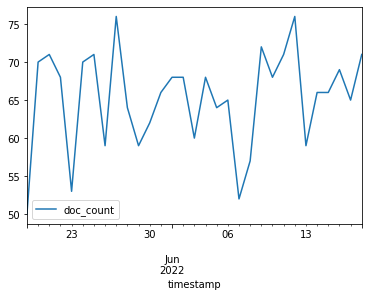

In [42]:
df_agg.plot(x='timestamp', y='doc_count')